# Objetive: 

### 1. Setup

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Set the style
plt.style.use("ggplot")
sns.set_theme()

# Remove scientific notation
pd.options.display.float_format = '{:,.2f}'.format

In [3]:
# Load dataset
file_path = "../Data/downloaded/premios_export.csv"
df = pd.read_csv(file_path)

### 2. Exploring The Data

In [4]:
# First lines of dataset
df.head()

,id,numero_sorteo,numero_premiado,letras,monto,vendedor,ciudad,departamento
0,87814,390,44,P,600.00,NaN,NaN,NaN
1,87815,390,80,DT,600.00,NaN,NaN,NaN
2,87816,390,129,TT,"1,000.00",NaN,NaN,NaN
3,87817,390,180,DT,600.00,NaN,NaN,NaN
4,87818,390,228,P,800.00,NaN,NaN,NaN


In [5]:
# General information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29271 entries, 0 to 29270
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               29271 non-null  int64  
 1   numero_sorteo    29271 non-null  int64  
 2   numero_premiado  29271 non-null  int64  
 3   letras           29271 non-null  object 
 4   monto            29271 non-null  float64
 5   vendedor         2734 non-null   object 
 6   ciudad           2382 non-null   object 
 7   departamento     2382 non-null   object 
dtypes: float64(1), int64(3), object(4)
memory usage: 1.8+ MB


In [6]:
# Statistics of dataset
df.describe()

,id,numero_sorteo,numero_premiado,monto
count,"29,271.00","29,271.00","29,271.00","29,271.00"
mean,"102,449.00","2,144.30","41,195.02","2,840.69"
std,"8,449.95","1,264.87","24,158.21","50,257.13"
min,"87,814.00",390.00,1.00,500.00
25%,"95,131.50",394.00,"20,136.00",600.00
50%,"102,449.00","3,052.00","41,210.00",700.00
75%,"109,766.50","3,060.00","61,557.00","1,000.00"
max,"117,084.00","3,068.00","99,995.00","5,000,000.00"


In [7]:
# null values per column
df.isnull().sum()

id                     0
numero_sorteo          0
numero_premiado        0
letras                 0
monto                  0
vendedor           26537
ciudad             26889
departamento       26889
dtype: int64

### 3. Data Imputation (cleaning)

In [8]:
# replace the null values with "N/A"
"""
Vendedor, ciudad and departamento are categorical variables, 
and filling them with N/A does not affect the analysis.
"""

df['vendedor'] = df['vendedor'].fillna("N/A")
df['ciudad'] = df['ciudad'].fillna("N/A")
df['departamento'] = df['departamento'].fillna("N/A")


In [9]:
# Removing column `id`
"""
Column id is not relevant for the analysis
therefore it can be removed.
"""
df.drop(columns=['id'], inplace=True)
df.head()

,numero_sorteo,numero_premiado,letras,monto,vendedor,ciudad,departamento
0,390,44,P,600.00,N/A,N/A,N/A
1,390,80,DT,600.00,N/A,N/A,N/A
2,390,129,TT,"1,000.00",N/A,N/A,N/A
3,390,180,DT,600.00,N/A,N/A,N/A
4,390,228,P,800.00,N/A,N/A,N/A


In [10]:
# null values per column
df.isnull().sum()

numero_sorteo      0
numero_premiado    0
letras             0
monto              0
vendedor           0
ciudad             0
departamento       0
dtype: int64

### 4. Basic Statistic in amount (monto)

In [11]:
print(df['monto'].describe())

count      29,271.00
mean        2,840.69
std        50,257.13
min           500.00
25%           600.00
50%           700.00
75%         1,000.00
max     5,000,000.00
Name: monto, dtype: float64


### 5. Distribution Prize by amount (monto ganado)

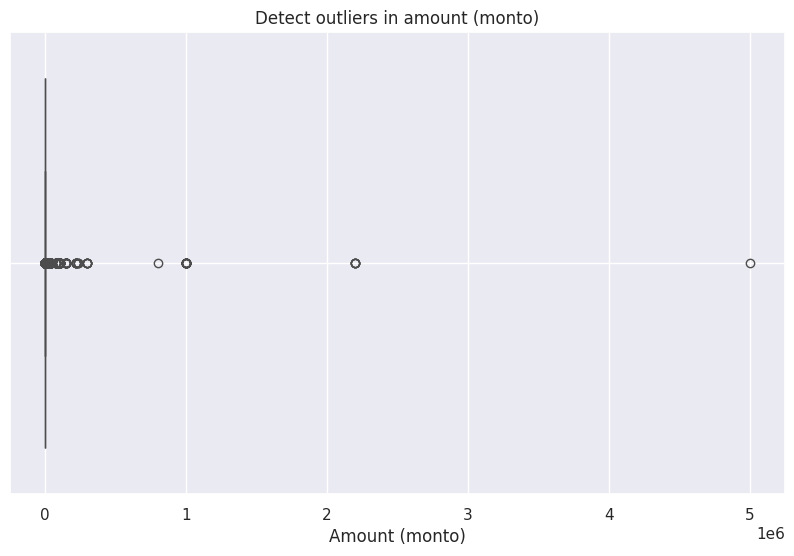

In [12]:
plt.figure(figsize=(10, 6))

# Create boxplot
sns.boxplot(x=df['monto'], color='orange')

# Set title and tags
plt.title('Detect outliers in amount (monto)')
plt.xlabel('Amount (monto)')
plt.grid(True)
plt.show()


##### Distribution Prize by amount (Interquartile Range)

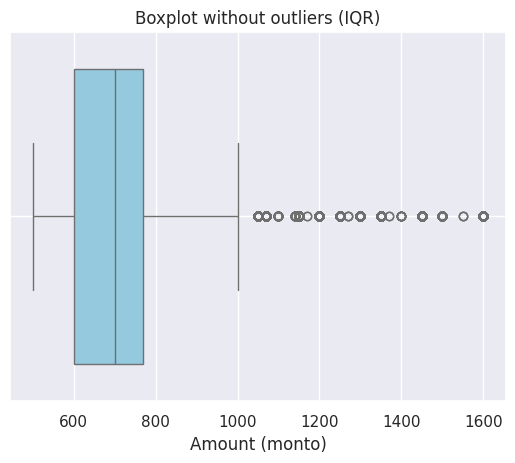

In [13]:
Q1 = df['monto'].quantile(0.25)
Q3 = df['monto'].quantile(0.75)
IQR = Q3 - Q1

# Filter values ​​within the interquartile range
df_filtered = df[(df['monto'] >= Q1 - 1.5 * IQR) & (df['monto'] <= Q3 + 1.5 * IQR)]

plt.Figure(figsize=(10,6))

# Create boxplot without outliers
sns.boxplot(x=df_filtered['monto'], color='skyblue')
plt.title("Boxplot without outliers (IQR)")
plt.xlabel('Amount (monto)')
plt.grid(True)
plt.show()

### General Boxplot for numbers with prize

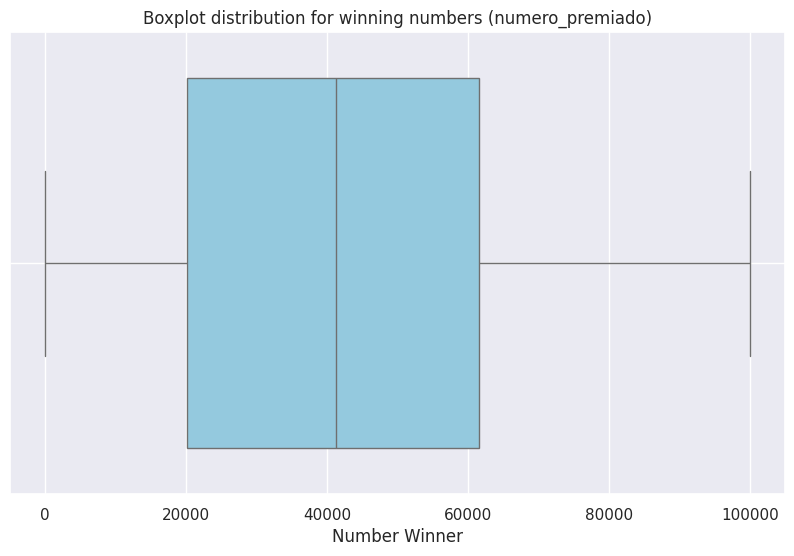

In [22]:
plt.figure(figsize=(10, 6))

# Boxplot for numbers with prize (numero_premiado)
sns.boxplot(x=df['numero_premiado'], color="skyblue")

plt.title('Boxplot distribution for winning numbers (numero_premiado)')
plt.xlabel('Number Winner')
plt.grid(True)
plt.show()

### Boxplot for numbers and letter combinations ('numeros_premiados', 'letras')

/tmp/ipykernel_5954/1708299210.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='letras', y='numero_premiado', data=df, palette='viridis')


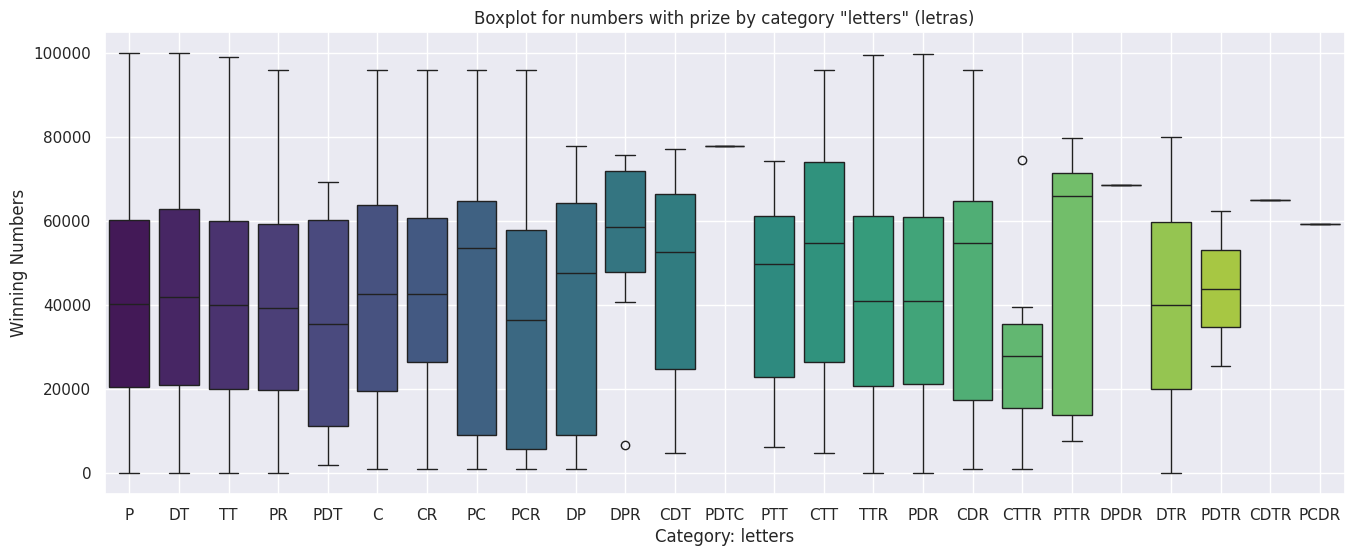

In [21]:
plt.figure(figsize=(16, 6))

# Boxplot by letters (letras) 
sns.boxplot(x='letras', y='numero_premiado', data=df, palette='viridis')

plt.title('Boxplot for numbers with prize by category "letters" (letras)')
plt.xlabel('Category: letters')
plt.ylabel('Winning Numbers')
plt.grid(True)
plt.show()